## 🔍 Most Demanded Skills for the Top 3 Data Roles

### 🧭 Methodology

- **Step 1: Clean the Skill Data**  
  Parse and normalize the `job_skills` column to ensure all skill entries are properly formatted and consistent.

- **Step 2: Identify Top Roles**  
  Determine the three most frequently occurring job titles using `job_title_short`.

- **Step 3: Aggregate Skill Demand**  
  For each of the top roles, calculate the frequency of each skill across job listings.

- **Step 4: Calculate Skill Prevalence**  
  Convert raw skill counts into percentages to highlight the most commonly required skills per role.

- **Step 5: Visualize the Insights**  
  Create comparative visualizations (e.g., bar plots) to showcase the top skills demanded in each of the top three roles.


In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

#Loading Data
dataset=load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Filter the dataframe to include only Data Analyst roles located in the United States
df_US = df[df['job_country'] == 'United States']

In [ ]:
# Explode the 'job_skills' column so that each skill in the list becomes a separate row
df_skills = df_US.explode('job_skills')

In [8]:
# Group by 'job_skills' and 'job_title_short' to count the occurrences of each skill per job title
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Reset the index to turn the groupby result into a DataFrame and rename the count column to 'skill_count'
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sort the DataFrame by 'skill_count' in descending order to see the most common skills at the top
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

# Display the resulting DataFrame
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [12]:
# Get the unique job titles from the skill count DataFrame
job_titles = df_skills_count['job_title_short'].unique().tolist()

# Sort and select the first three job titles (top 3 roles)
job_titles = sorted(job_titles[:3])

# Display the top 3 job titles
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [23]:
job_title_count=df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [25]:
df_skills_perc= pd.merge( df_skills_count,job_title_count,how='left', on='job_title_short')

df_skills_perc['skill_percent']=100* df_skills_perc['skill_count']/ df_skills_perc['jobs_total']

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


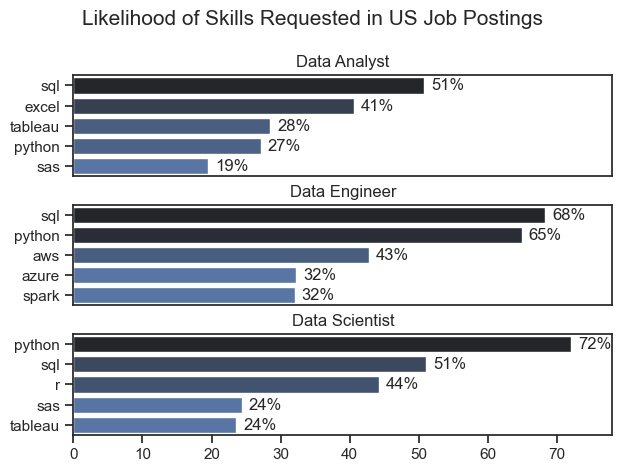

In [47]:
# Create a subplot for each of the top 3 job titles and plot the top 5 skills for each
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    # Filter for the current job title and select top 5 skills by percentage
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    # Plot horizontal bar chart of skill percentages, colored by skill count
    sns.barplot(
        data=df_plot,
        x='skill_percent',
        y='job_skills',
        ax=ax[i],
        hue='skill_count',
        palette='dark:b_r',
        legend=False
    )
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 78)

    # Annotate each bar with the percentage value
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

    # Hide x-axis ticks for all but the last subplot
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

# Set the overall title and adjust layout
fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)

plt.show()